# Insurance Claim Prediction

## Problem Statement

CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 

Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('train_qWM28Yl.csv')

In [3]:
pd.set_option('display.max_columns',60)

In [4]:
df.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.80,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.00,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,2,No,Yes,No,Yes,No,Drum,1497,4,Manual,5,Electric,5.00,3990,1755,1523,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


### Data Dictionary

policy_tenure : The policy tenure can be any period ranging from 1 year to 100 years or whole life

age_of_car: range b/w 0 to 1

age_of_policyholder : .28 to 1

area_cluster : area of clester

population_density : Population density of the city (Policyholder City) range 290 to 73430

make :Encoded Manufacturer/company of the car total 5 company are there 

segment : Segment of the car (A/ B1/ B2/ C1/ C2)

model:Encoded name of the car

fuel_type: Type of fuel used by the car 3 types

max_torque: Maximum Torque generated by the car (Nm@rpm) An engine's power is the product of force and the speed with which this force acts. Engine power and torque are both indicators that depend on the engine speed. A high torque enables efficient and energy-saving driving. A high engine power enables a car to accelerate quickly and reach a high top speed.

max_power : Maximum Power generated by the car (bhp@rpm)

engine_type: diff type of engine

airbags : Number of airbags installed in the car we can drop this

is_esc : Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not. ESC is designed to automatically help stabilize your car when it detects a momentary loss of control

is_adjustable_steering : steering wheel of the car is adjustable or not. hold the steering wheel of their vehicle are less likely to have an accident and will be able to use their vehicle more efficiently

is_tpms: Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.

is_parking_sensors:parking sensors are present in the car or not.

is_parking_camera :Boolean flag indicating whether the parking camera is present in the car or not.

rear_brakes_type:Type of brakes used in the rear of the car

displacement:Engine displacement of the car (cc)  not that important

cylinder : Number of cylinders present in the engine of the car 3 to 4 not that important

transmission_type:Transmission type of the car. manual or auto  not that important

gear_box : Number of gears in the car  not that important

steering_type : Type of the power steering present in the car  Power steering in cars helps to adjust the steering speed based on road conditions.

turning_radius : The space a vehicle needs to make a certain turn (Meters) 4.5 to 5.2

length: Length of the car (Millimetre)

width:width of car

height:height of car

gross_weight:The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)

is_front_fog_lights: Boolean flag indicating whether front fog lights are available in the car or not.

is_rear_window_wiper:  rear window wiper

is_rear_window_washer:Boolean flag indicating whether the rear window washer is available in the car or not.

is_rear_window_defogger:Boolean flag indicating whether rear window defogger is available in the car or not.

is_brake_assist: Boolean flag indicating whether the brake assistance feature is available in the car or not.

is_power_door_lock:Boolean flag indicating whether a power door lock is available in the car or not.

is_central_locking:Boolean flag indicating whether the central locking feature is available in the car or not.

is_power_steering : Boolean flag indicating whether power steering is available in the car or not.

is_driver_seat_height_adjustable:Boolean flag indicating whether the height of the driver seat is adjustable or not.

is_day_night_rear_view_mirror : Boolean flag indicating whether day & night rearview mirror is present in the car or not.

is_ecw :Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not.

is_speed_alert:Boolean flag indicating whether the speed alert system is available in the car or not.

ncap_rating:Safety rating given by NCAP (out of 5)

is_claim:Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.




In [5]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [6]:
df.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [7]:
df.shape

(58592, 44)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


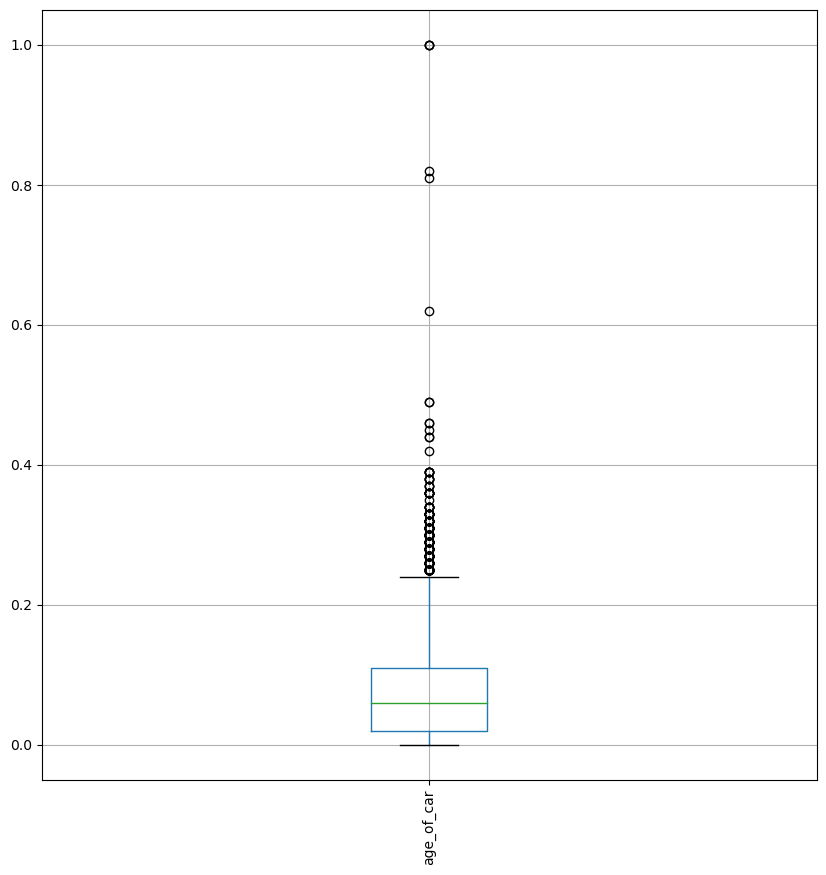

In [9]:
df.boxplot('age_of_car', figsize=(10, 10), rot=90);

In [10]:
numeric_cols = df.select_dtypes('number').columns.tolist()

In [11]:
df['model'] = df['model'].str.replace('M','') # replace M with space

In [12]:
numeric_cols

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

In [13]:
sns.boxplot(x = 'area_cluster',y='age_of_car', data = df);

In [14]:
# 'area_cluster' > 0.6

In [15]:
sns.boxplot(x = 'is_claim',y='population_density', data = df);

In [16]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

In [17]:
df['engine_type'].nunique()

11

In [18]:
df['is_claim'].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

In [19]:
sns.countplot(df['is_claim'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_claim', ylabel='count'>

In [20]:
df[['max_torque_Nm','max_torque_rpm']] = df['max_torque'].str.split('@', expand = True)

In [21]:
df[['max_power_bhp','max_power_rpm']] = df['max_power'].str.split('@', expand = True)

In [22]:
df.drop(['max_torque','max_power'], axis = 1, inplace = True)

In [23]:
df.drop(columns = ["is_central_locking","is_driver_seat_height_adjustable","is_ecw","rear_brakes_type",'is_rear_window_washer',"is_adjustable_steering",'is_esc'],inplace=True,axis=1)

In [24]:
categorical_cols = df.select_dtypes(object).columns.tolist()

In [25]:
le = LabelEncoder()

In [26]:
categorical_cols

['policy_id',
 'area_cluster',
 'segment',
 'model',
 'fuel_type',
 'engine_type',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_power_steering',
 'is_day_night_rear_view_mirror',
 'is_speed_alert',
 'max_torque_Nm',
 'max_torque_rpm',
 'max_power_bhp',
 'max_power_rpm']

In [27]:
for col in categorical_cols:
    print(f'{col} contains {df[col].nunique()} values')

policy_id contains 58592 values
area_cluster contains 22 values
segment contains 6 values
model contains 11 values
fuel_type contains 3 values
engine_type contains 11 values
is_tpms contains 2 values
is_parking_sensors contains 2 values
is_parking_camera contains 2 values
transmission_type contains 2 values
steering_type contains 3 values
is_front_fog_lights contains 2 values
is_rear_window_wiper contains 2 values
is_rear_window_defogger contains 2 values
is_brake_assist contains 2 values
is_power_door_locks contains 2 values
is_power_steering contains 2 values
is_day_night_rear_view_mirror contains 2 values
is_speed_alert contains 2 values
max_torque_Nm contains 8 values
max_torque_rpm contains 8 values
max_power_bhp contains 9 values
max_power_rpm contains 5 values


In [28]:
df[categorical_cols] = df[categorical_cols].apply(lambda col : le.fit_transform(col))

In [29]:
df[df['is_claim']==1]

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_power_steering,is_day_night_rear_view_mirror,is_speed_alert,ncap_rating,is_claim,max_torque_Nm,max_torque_rpm,max_power_bhp,max_power_rpm
12,12,0.045834,0.03,0.480769,15,4076,1,2,7,2,8,2,0,1,0,1197,4,1,5,0,4.80,3845,1735,1530,1335,1,0,0,1,1,1,1,1,2,1,0,7,6,4
19,19,0.758623,0.09,0.394231,17,34738,1,2,7,2,8,2,0,1,0,1197,4,1,5,0,4.80,3845,1735,1530,1335,1,0,0,1,1,1,1,1,2,1,0,7,6,4
21,21,0.527085,0.00,0.615385,16,21622,1,0,0,0,6,2,0,1,0,796,3,1,5,2,4.60,3445,1515,1475,1185,0,0,0,0,0,1,0,1,0,1,4,4,2,4
23,23,0.999443,0.08,0.576923,11,27003,3,4,5,1,3,6,1,1,1,1493,4,0,6,2,5.20,4300,1790,1635,1720,1,1,1,1,1,1,0,1,3,1,3,1,0,1
24,24,0.020563,0.01,0.480769,20,8794,1,0,0,0,6,2,0,1,0,796,3,1,5,2,4.60,3445,1515,1475,1185,0,0,0,0,0,1,0,1,0,1,4,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58559,58559,0.484333,0.12,0.596154,20,8794,1,2,8,2,1,6,0,1,1,1197,4,0,5,0,4.85,3990,1745,1500,1410,1,1,1,1,1,1,1,1,0,1,0,7,6,4
58567,58567,1.148102,0.04,0.451923,3,34791,3,4,5,1,3,6,1,1,1,1493,4,0,6,2,5.20,4300,1790,1635,1720,1,1,1,1,1,1,0,1,3,1,3,1,0,1
58573,58573,0.151652,0.00,0.365385,0,4990,1,0,0,0,6,2,0,1,0,796,3,1,5,2,4.60,3445,1515,1475,1185,0,0,0,0,0,1,0,1,0,1,4,4,2,4
58574,58574,0.278499,0.07,0.557692,4,5410,3,4,5,1,3,6,1,1,1,1493,4,0,6,2,5.20,4300,1790,1635,1720,1,1,1,1,1,1,0,1,3,1,3,1,0,1


In [30]:
X = df.drop(['policy_id','is_claim'], axis = 1)
y = df['is_claim']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,stratify = y)

In [63]:
ctb = CatBoostClassifier(depth=10,
                         loss_function='CrossEntropy', 
                         eval_metric='F1',                        
                         iterations =2000,
                         random_state=13 
                         )

In [64]:
ctb.fit(X_train, y_train, verbose=0)

In [65]:
y_pred = ctb.predict(X_test)

In [66]:
print('Accuracy score train:', accuracy_score(y_train, ctb.predict(X_train)), 'test: ', accuracy_score(y_test, y_pred))
print('F1 score train:', f1_score(y_train, ctb.predict(X_train)), 'test: ', f1_score(y_test, y_pred))

Accuracy score train: 0.9516657564172584 test:  0.9346668487165484
F1 score train: 0.3927958833619211 test:  0.006230529595015576


In [67]:
print("Classifiaction report: \n" ,classification_report(y_test, y_pred))
print('Confsion matrix: \n', confusion_matrix(y_test, y_pred))

Classifiaction report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.12      0.00      0.01       937

    accuracy                           0.93     14648
   macro avg       0.53      0.50      0.49     14648
weighted avg       0.88      0.93      0.90     14648

Confsion matrix: 
 [[13688    23]
 [  934     3]]


In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
sm = SMOTE(random_state= 42)

In [70]:
X_trainsm, y_trainsm = sm.fit_resample(X_train,y_train)

In [71]:
ctb.fit(X_trainsm, y_trainsm, verbose=0)

In [72]:
y_predsm = ctb.predict(X_test)

In [73]:
print('Accuracy score train:', accuracy_score(y_trainsm, ctb.predict(X_trainsm)), 'test: ', accuracy_score(y_test, y_predsm))
print('F1 score train:', f1_score(y_trainsm, ctb.predict(X_trainsm)), 'test: ', f1_score(y_test, y_predsm))

Accuracy score train: 0.9714949067658571 test:  0.9318678317859094
F1 score train: 0.9707025149610824 test:  0.021568627450980392


In [74]:
print("Classifiaction report: \n" ,classification_report(y_test, y_predsm))
print('Confusion matrix: \n', confusion_matrix(y_test, y_predsm))

Classifiaction report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     13711
           1       0.13      0.01      0.02       937

    accuracy                           0.93     14648
   macro avg       0.53      0.50      0.49     14648
weighted avg       0.88      0.93      0.90     14648

Confusion matrix: 
 [[13639    72]
 [  926    11]]
